# Spherical Gradient Lighting Sequence by Example

This page explores spherical gradient lighting, as trialled by Ma 2007 with USC ICT LS3-5 Lightstage by Debevec, et al.

The script loads a frame (the icosahedron 3v dome, with vertex numbering specified for the Aber Lightstage) orders the vertices by their x-axis position and applies a "spherical gradient" (a `gradient value`) to each light, corresponding to a smooth illumination of the target.

The `gradient value` can be used as a relative light wattage output value, within the constraints of control bit values per light's hardware interface. These spherical gradient values are proportional to their x-axis positions to the sphere, such that the target's illumination remains balanced. 

The plots below help to illustrate how each gradient value is applied to each light, pre-ordered by it's x-axis position, and through a series of rotations culminating in a lighting sequence.


## Imports & Declarations

To start this isolated test of the spherical gradient sequence code, we make the relevant imports and define a plot to visualise the output.

In [200]:
default_path = "../../src/"
import sys
sys.path.insert(0, default_path)
%matplotlib notebook
from spherical_gradient import GradientSequence_IntervalSpecified
from data_3d import WaveFront
import matplotlib.pyplot as plt


def barplot(x,y=None):
    if y is not None:
        fig, ax = plt.subplots(1,2)
        d = [x,y]
        for i in range(len(ax)):
            a = ax[i]
            b = d[i]
            a.bar(range(len(b)), b)
    else:
        fig, ax = plt.subplots(1,1)
        ax.bar(range(len(x)), x)

## Configuring the Lighting Sequence Algorithm

Next we import the lightstage frame, specifying where each LED is located `[(x,y,z),..]`.

For the `hardcoded_frame()` case, we assume every frame vertex is going to have an LED. But it needn't be that way. 

Note: the icosahedron frame's vertices' x-axis positions are not uniformly distributed around the x-axis of the sphere. We could apply a uniformly distributed set as light positions. You can try each out below to see the effect on gradient smoothness.

In [201]:
leds = WaveFront.get_hardcoded_frame( scale=8 )
# leds = zip( range(-8,9,1), range(-8,9,1), range(-8,9,1) )
print(len(leds))

92


Next we specify each light's `baseline_intensity`, that is the light's default wattage output value; which can be specified as `1.0` for no effect. Later, this will be used as a multiplier to the gradient value.

It can also be defined via a CSV file as a tuned set of values. See for example, (Brightness Control Tuning)[https://github.com/LightStage-Aber/LightStage-Repo#optimise-evenness-of-any-light-position-set--m3]. With this tool, we can minimise the effects of imperfectly balanced positions of the lights, thus further improving the lighting balance.

In [202]:
baseline_intensity = [1.0]*len(leds)

Next, we specify the `scaled_range` of 0.5-1.0 to each light. That is the `min/max` range of gradient value to be applied to each light position.

The `quantity_of_intervals` let us control the granularity of rotations. Each plot sequence below is an output of from the current rotation. The sphere of light positions is going to appear to rotate, with a number of granular stops. That's what this value defines.

Below, there are 5 granular rotations, defined by `quantity_of_intervals`.

Then we instantiate the `GradientSequence` object.

In [203]:
scaled_range = [0.5, 1.0]
quantity_of_intervals = 5
gs = GradientSequence_IntervalSpecified( leds, baseline_intensity, "x", scaled_range, quantity_of_intervals )

## Getting Each Rotation's Gradients of the Sequence:

To request the first (and next) rotation's lighting configuration, we call `gs.get_next_sequence()`.

We can also track the sequence progress, by requesting the rotation number of the current loop, and the loop number with `gs.get_sequence_number()`.

In [204]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)

1
0


From the result, we extract data from the `BaseSequenceContainer` class objects, including `c.get_index()` for the vertex index and `c.get_intensity()` for the light's (relative) wattage output value.

Each light's `c.get_intensity()` wattage output value is multiplied by a wattage output value (`baseline_intensity`) that can be specified as `1.0` for no effect.

1
0


<IPython.core.display.Javascript object>


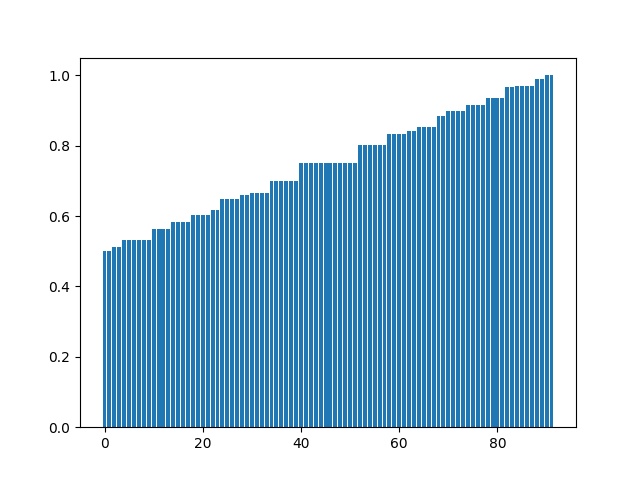

In [205]:
gradient_intensities = [ c.get_intensity() for c in l ]
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
# print(gradient_intensities)
barplot(gradient_intensities)

2
0


<IPython.core.display.Javascript object>


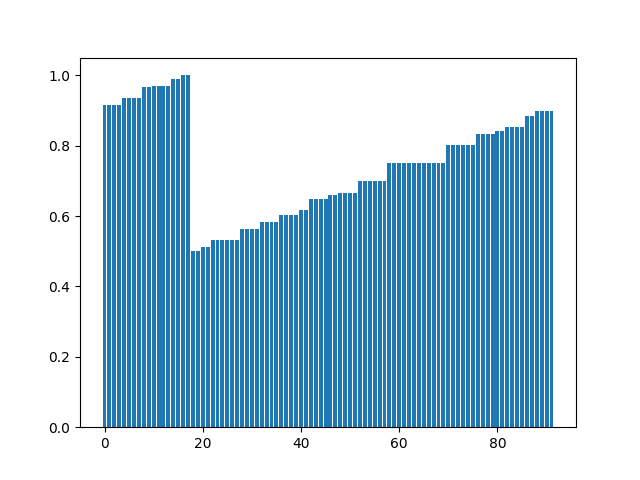

In [206]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
gradient_intensities = [ c.get_intensity() for c in l ]
barplot(gradient_intensities)

3
0


<IPython.core.display.Javascript object>


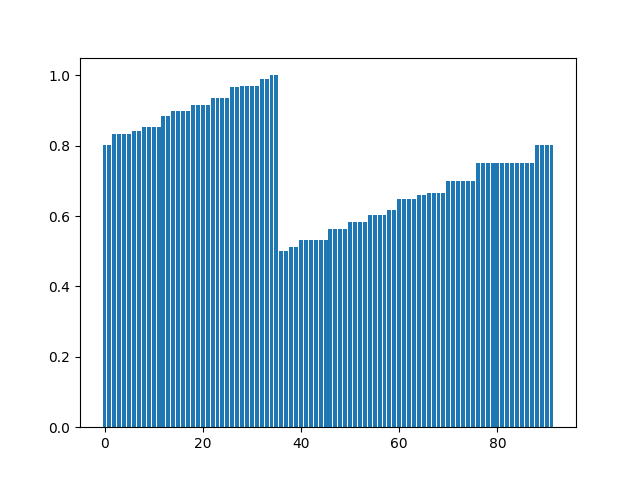

In [207]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
gradient_intensities = [ c.get_intensity() for c in l ]
barplot(gradient_intensities)

4
0


<IPython.core.display.Javascript object>


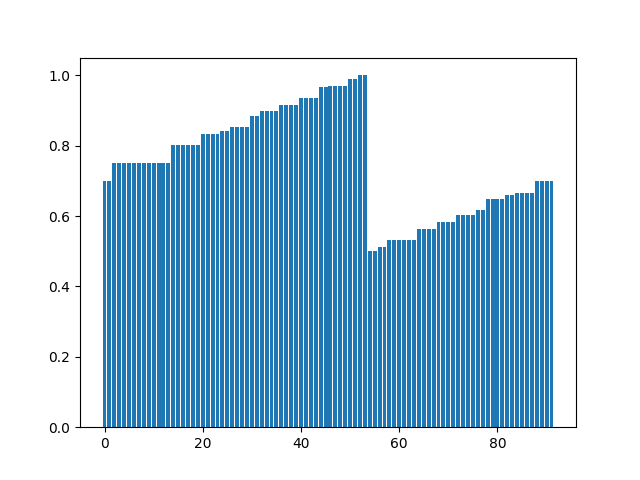

In [208]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
gradient_intensities = [ c.get_intensity() for c in l ]
barplot(gradient_intensities)

5
0


<IPython.core.display.Javascript object>


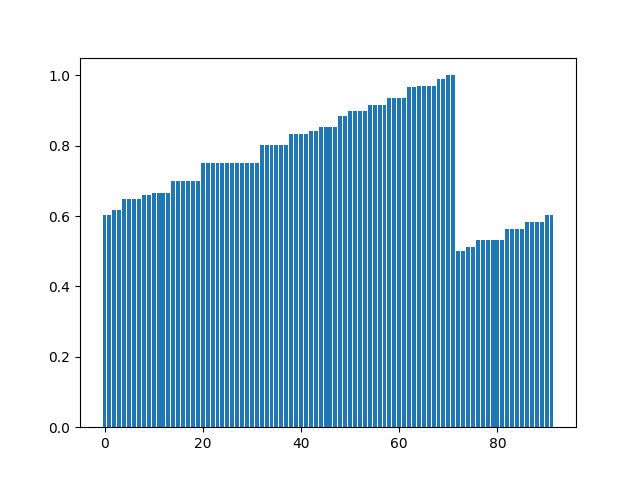

In [209]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
gradient_intensities = [ c.get_intensity() for c in l ]
barplot(gradient_intensities)

1
1


<IPython.core.display.Javascript object>


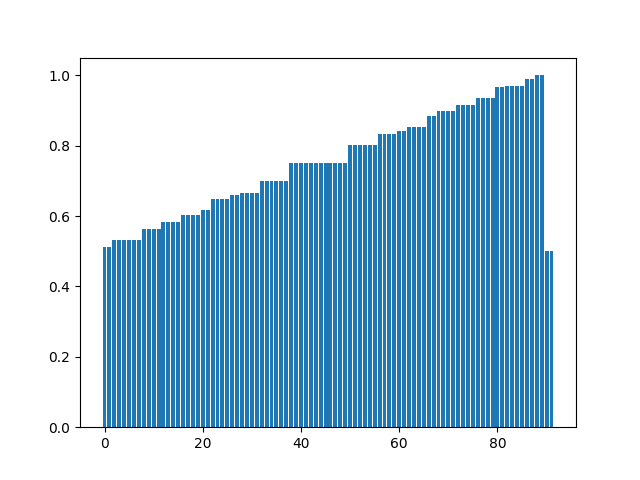

In [210]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
gradient_intensities = [ c.get_intensity() for c in l ]
barplot(gradient_intensities)

2
1


<IPython.core.display.Javascript object>


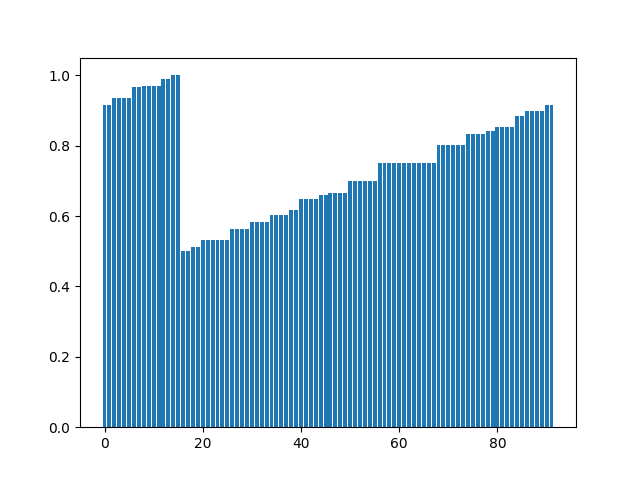

In [211]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
gradient_intensities = [ c.get_intensity() for c in l ]
barplot(gradient_intensities)

# Adjust X,Y,Z Axis Rotations:

By specifying the axis argument with a value from ["x","y","z"], we can control those gradients along alternative axes from x.

In this series of plots, we'll plot the intensity value with the (spiralling) LED index position [0-91].

# X Axis Rotations:

Do so as follows:

In [212]:
gs = GradientSequence_IntervalSpecified(
            leds, 
            baseline_intensity,
            axis="x",
            scaled_range=[0.5, 1.0], 
            quantity_of_intervals=quantity_of_intervals
            )

1
0


<IPython.core.display.Javascript object>


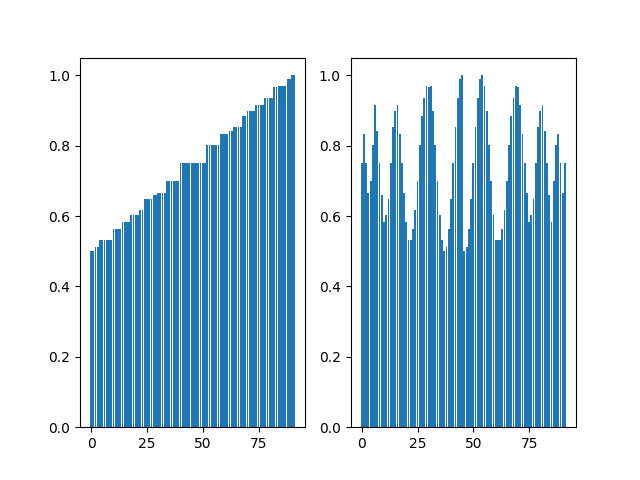

In [213]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
l = list(l)
l2 = sorted(l, key=lambda x: x.get_index())
native_order = [ c.get_intensity() for c in l ]
axis_order = [ c.get_intensity() for c in l2 ]
barplot(native_order, axis_order)

2
0


<IPython.core.display.Javascript object>


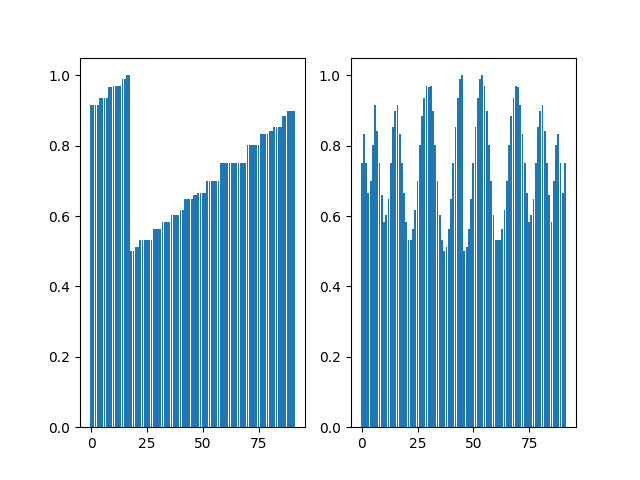

In [214]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
l = list(l)
l2 = sorted(l, key=lambda x: x.get_index())
native_order = [ c.get_intensity() for c in l ]
axis_order = [ c.get_intensity() for c in l2 ]
barplot(native_order, axis_order)

3
0


<IPython.core.display.Javascript object>


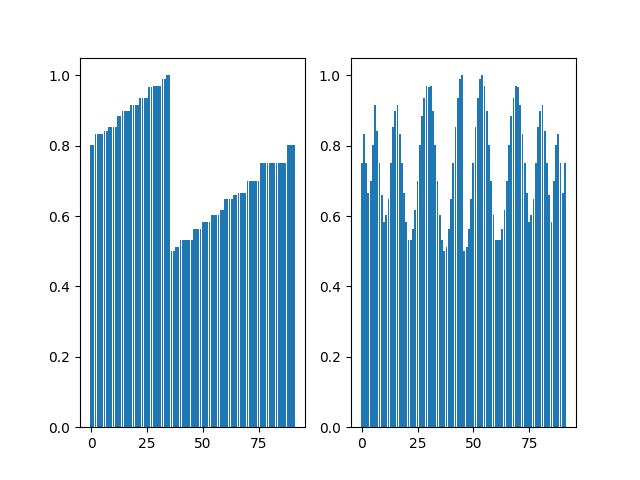

In [215]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
l = list(l)
l2 = sorted(l, key=lambda x: x.get_index())
native_order = [ c.get_intensity() for c in l ]
axis_order = [ c.get_intensity() for c in l2 ]
barplot(native_order, axis_order)

4
0


<IPython.core.display.Javascript object>


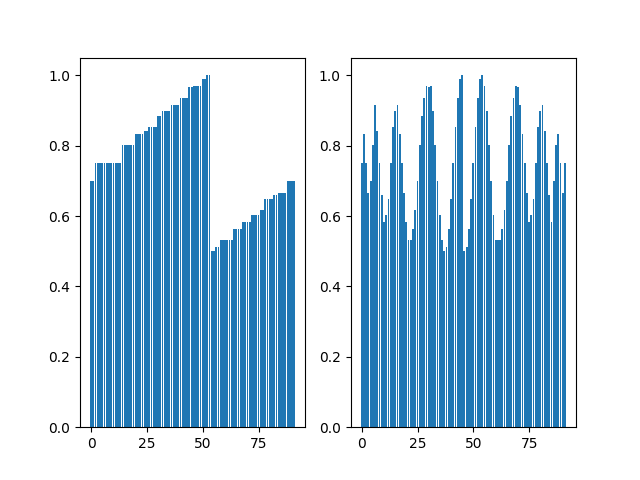

In [216]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
l = list(l)
l2 = sorted(l, key=lambda x: x.get_index())
native_order = [ c.get_intensity() for c in l ]
axis_order = [ c.get_intensity() for c in l2 ]
barplot(native_order, axis_order)

5
0


<IPython.core.display.Javascript object>


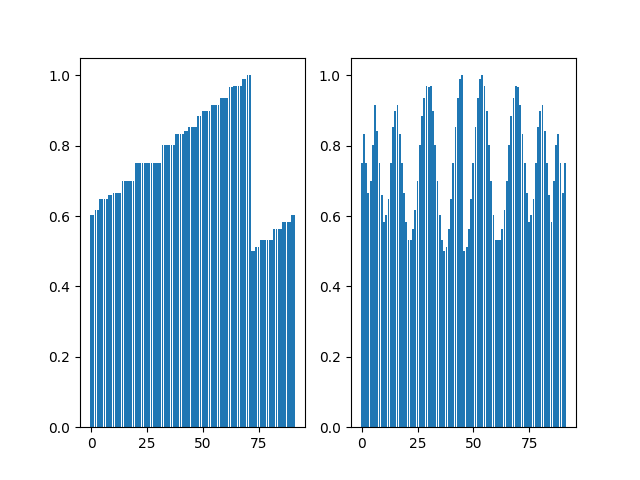

In [217]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
l = list(l)
l2 = sorted(l, key=lambda x: x.get_index())
native_order = [ c.get_intensity() for c in l ]
axis_order = [ c.get_intensity() for c in l2 ]
barplot(native_order, axis_order)

1
1


<IPython.core.display.Javascript object>


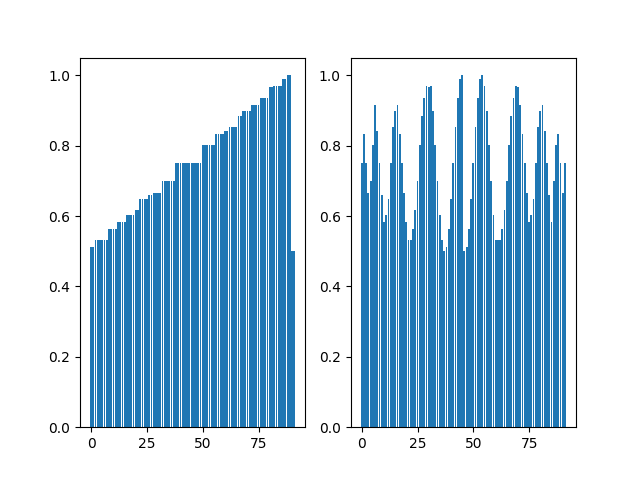

In [218]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
l = list(l)
l2 = sorted(l, key=lambda x: x.get_index())
native_order = [ c.get_intensity() for c in l ]
axis_order = [ c.get_intensity() for c in l2 ]
barplot(native_order, axis_order)

# Y Axis Rotations:

Do so as follows:

In [219]:
gs = GradientSequence_IntervalSpecified(
            leds, 
            baseline_intensity,
            axis="y",
            scaled_range=[0.5, 1.0], 
            quantity_of_intervals=quantity_of_intervals
            )

1
0


<IPython.core.display.Javascript object>


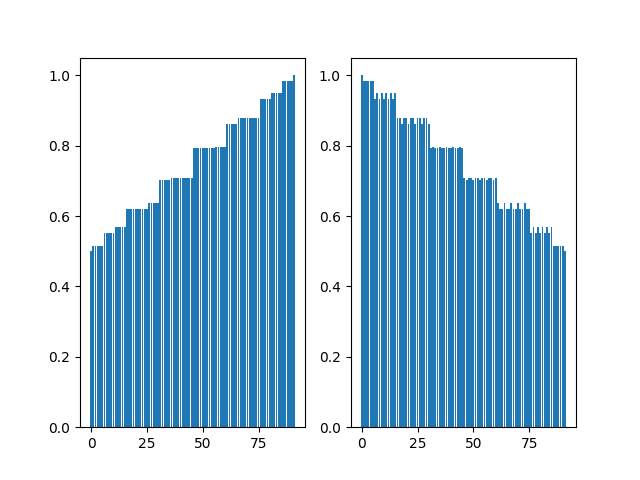

In [220]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
l = list(l)
l2 = sorted(l, key=lambda x: x.get_index())
native_order = [ c.get_intensity() for c in l ]
axis_order = [ c.get_intensity() for c in l2 ]
barplot(native_order, axis_order)

2
0


<IPython.core.display.Javascript object>


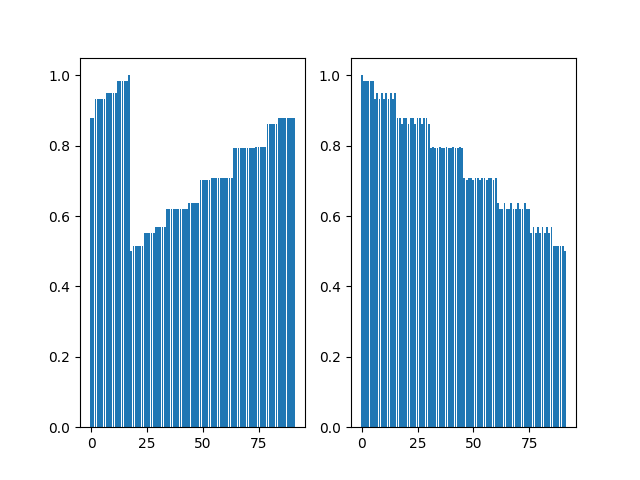

In [221]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
l = list(l)
l2 = sorted(l, key=lambda x: x.get_index())
native_order = [ c.get_intensity() for c in l ]
axis_order = [ c.get_intensity() for c in l2 ]
barplot(native_order, axis_order)

3
0


<IPython.core.display.Javascript object>


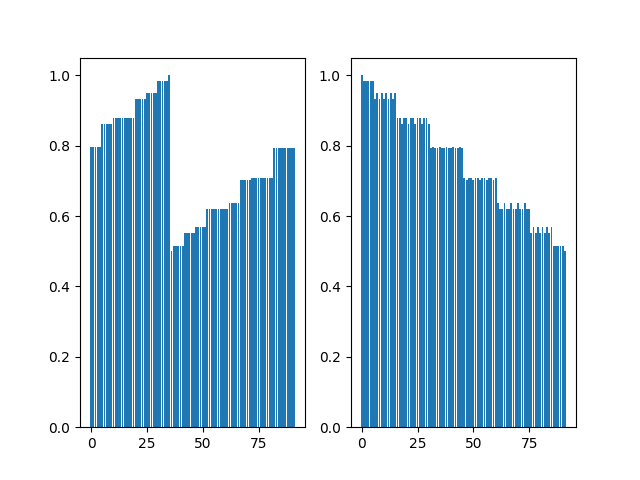

In [222]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
l = list(l)
l2 = sorted(l, key=lambda x: x.get_index())
native_order = [ c.get_intensity() for c in l ]
axis_order = [ c.get_intensity() for c in l2 ]
barplot(native_order, axis_order)

4
0


<IPython.core.display.Javascript object>


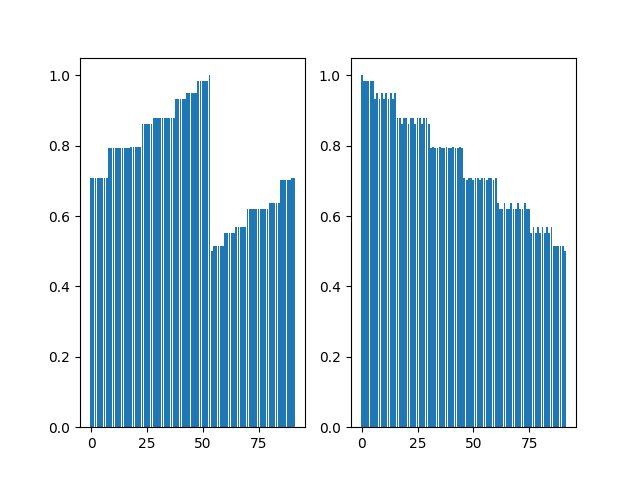

In [223]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
l = list(l)
l2 = sorted(l, key=lambda x: x.get_index())
native_order = [ c.get_intensity() for c in l ]
axis_order = [ c.get_intensity() for c in l2 ]
barplot(native_order, axis_order)

5
0


<IPython.core.display.Javascript object>


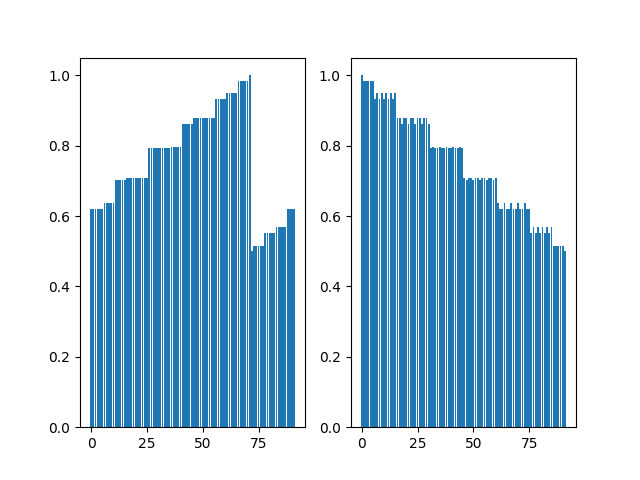

In [224]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
l = list(l)
l2 = sorted(l, key=lambda x: x.get_index())
native_order = [ c.get_intensity() for c in l ]
axis_order = [ c.get_intensity() for c in l2 ]
barplot(native_order, axis_order)

1
1


<IPython.core.display.Javascript object>


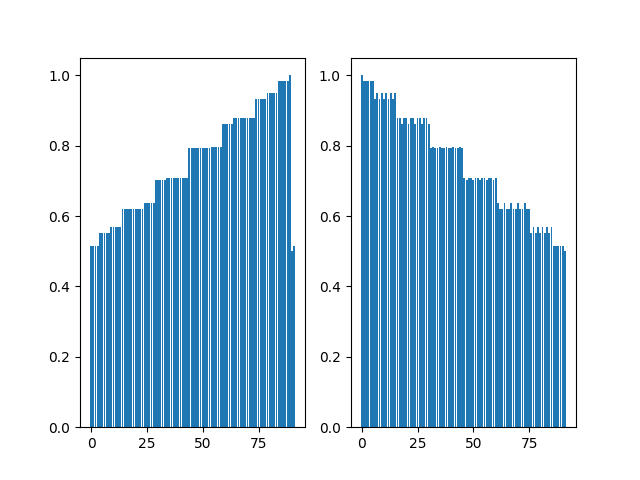

In [225]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
l = list(l)
l2 = sorted(l, key=lambda x: x.get_index())
native_order = [ c.get_intensity() for c in l ]
axis_order = [ c.get_intensity() for c in l2 ]
barplot(native_order, axis_order)

# Z Axis Rotations:

Do so as follows:

In [226]:
gs = GradientSequence_IntervalSpecified(
            leds, 
            baseline_intensity,
            axis="z",
            scaled_range=[0.5, 1.0], 
            quantity_of_intervals=quantity_of_intervals
            )

1
0


<IPython.core.display.Javascript object>


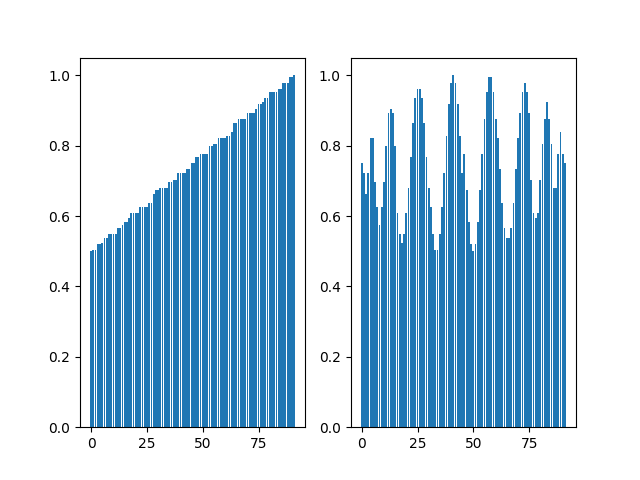

In [227]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
l = list(l)
l2 = sorted(l, key=lambda x: x.get_index())
native_order = [ c.get_intensity() for c in l ]
axis_order = [ c.get_intensity() for c in l2 ]
barplot(native_order, axis_order)

2
0


<IPython.core.display.Javascript object>


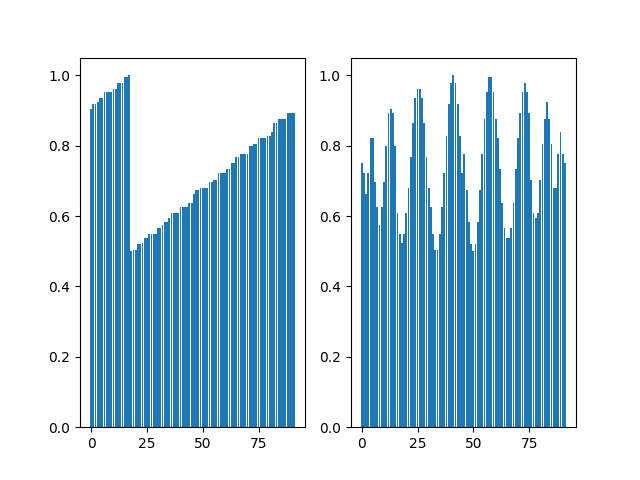

In [228]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
l = list(l)
l2 = sorted(l, key=lambda x: x.get_index())
native_order = [ c.get_intensity() for c in l ]
axis_order = [ c.get_intensity() for c in l2 ]
barplot(native_order, axis_order)

3
0


<IPython.core.display.Javascript object>


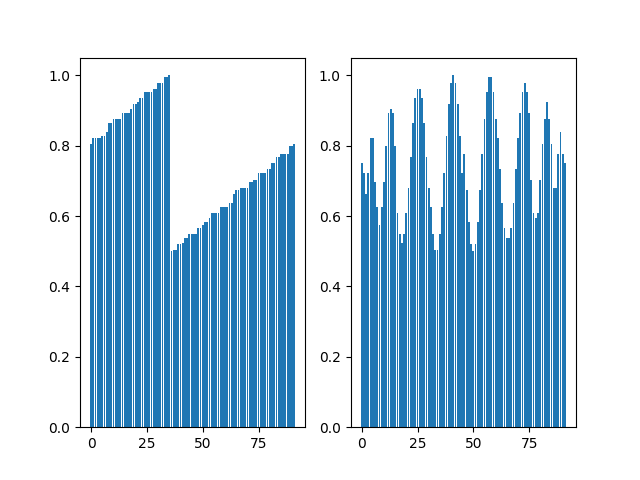

In [229]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
l = list(l)
l2 = sorted(l, key=lambda x: x.get_index())
native_order = [ c.get_intensity() for c in l ]
axis_order = [ c.get_intensity() for c in l2 ]
barplot(native_order, axis_order)

4
0


<IPython.core.display.Javascript object>


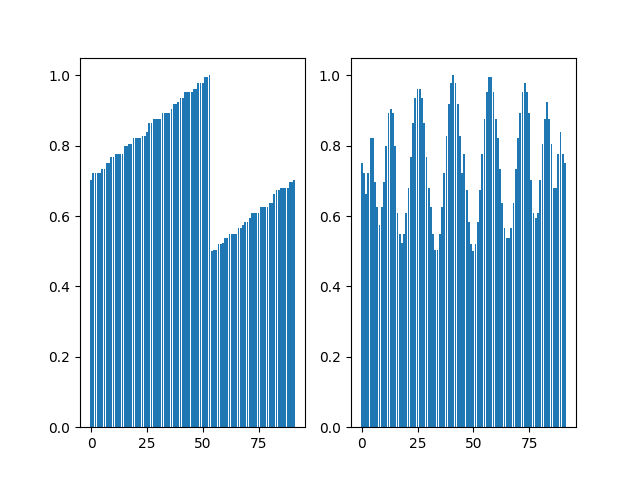

In [230]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
l = list(l)
l2 = sorted(l, key=lambda x: x.get_index())
native_order = [ c.get_intensity() for c in l ]
axis_order = [ c.get_intensity() for c in l2 ]
barplot(native_order, axis_order)

5
0


<IPython.core.display.Javascript object>


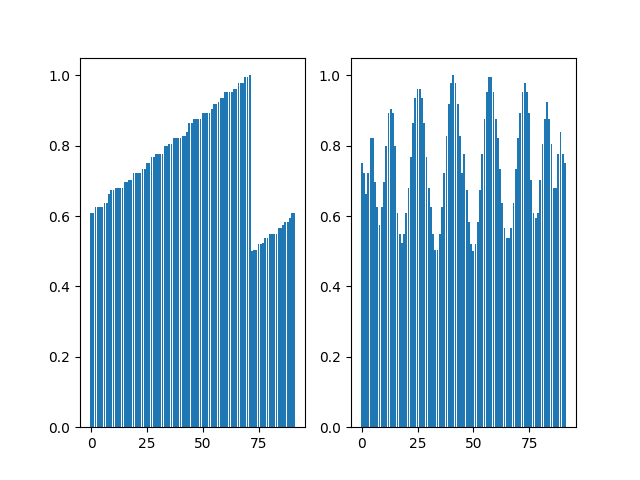

In [231]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
l = list(l)
l2 = sorted(l, key=lambda x: x.get_index())
native_order = [ c.get_intensity() for c in l ]
axis_order = [ c.get_intensity() for c in l2 ]
barplot(native_order, axis_order)

1
1


<IPython.core.display.Javascript object>


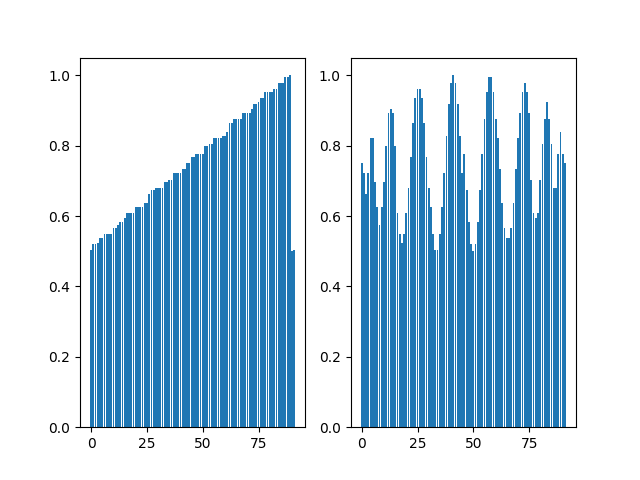

In [232]:
l = gs.get_next_sequence()
num, loop_num = gs.get_sequence_number()
print(num)
print(loop_num)
l = list(l)
l2 = sorted(l, key=lambda x: x.get_index())
native_order = [ c.get_intensity() for c in l ]
axis_order = [ c.get_intensity() for c in l2 ]
barplot(native_order, axis_order)